In [ ]:
import numpy as np
import pandas as pd
import librosa
import os
# import pydub
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Input,GlobalMaxPool1D, LSTM, RNN, SimpleRNN
from keras import Model
from keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('C:/Users/mural/Downloads/dataset')

In [ ]:
data_set=pd.read_csv("../dataset/train.csv")
data_set.head(10)

,file_id,gender
0,common_voice_hi_26204093,male
1,common_voice_hi_26043935,male
2,common_voice_hi_24632150,male
3,common_voice_hi_24359471,female
4,common_voice_hi_24639127,male
5,common_voice_hi_25983363,male
6,common_voice_hi_23832738,male
7,common_voice_hi_25154335,female
8,common_voice_hi_26080943,male
9,common_voice_hi_24360528,female


In [ ]:
filename = data_set['file_id'][0]
file_name = os.path.join(os.path.abspath("../dataset/train")+'\\'+str(filename)+'.mp3')
warnings.simplefilter('ignore')
dur = pydub.utils.mediainfo(file_name)["duration"]
audio_data, sample_rate = librosa.load(file_name, duration = math.floor(float(dur)))
print(sample_rate)

22050


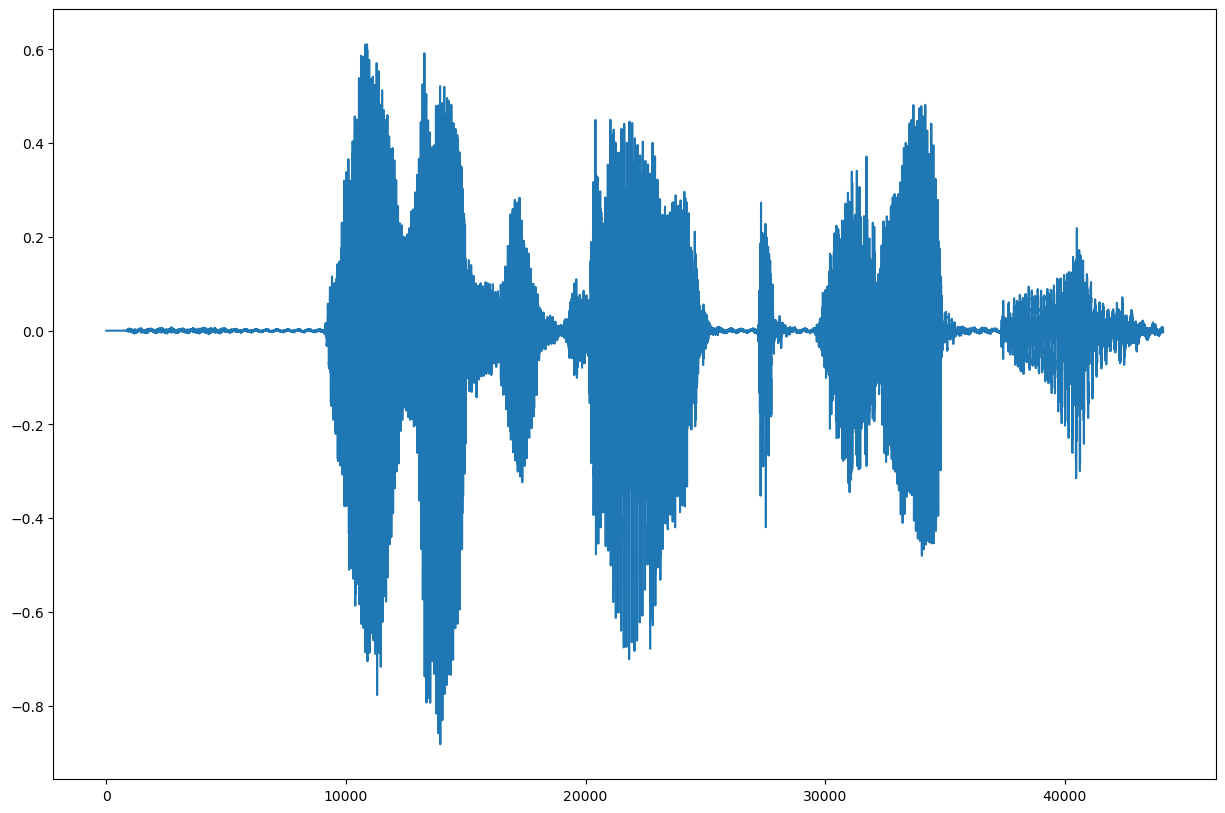

In [ ]:
filename=data_set["file_id"][3]
file_name = os.path.join(('../dataset/train')+'/'+str(filename)+'.mp3')
dur = pydub.utils.mediainfo(file_name)["duration"]
audio_data,sample_rate=librosa.load(file_name, duration = math.floor(float(dur)))
warnings.simplefilter("ignore")
plt.figure(figsize=(15,10))
plt.plot(audio_data)
ipd.Audio(file_name)

In [ ]:
mfccs=librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=50)

In [ ]:
mfccs=np.mean(mfccs.T,axis=0)

In [ ]:
mfccs

array([-2.6215027e+02,  7.0877548e+01, -2.3382349e+01,  4.1149715e+01,
       -3.3169644e+00, -1.7126663e+01, -6.0078901e-01, -1.2534468e+01,
       -1.6682571e+00, -8.7750511e+00, -7.7068582e-02, -3.0350714e+00,
       -7.6630006e+00,  8.0322962e+00, -5.7669783e+00,  9.2119139e-01,
       -3.4259746e+00, -1.6520007e+00, -1.1610321e+00, -4.4280997e-01,
       -5.8468866e+00, -3.5827653e+00,  2.9935366e-02,  3.7983956e+00,
       -4.9502245e-01,  7.9960728e+00,  1.8975668e-01,  5.3423152e+00,
        4.6896505e+00,  3.0030689e+00,  2.2660306e+00,  5.3910074e+00,
        4.5524335e+00,  4.5186567e+00,  3.4748652e+00,  3.3873723e+00,
        7.4902344e-01, -9.4854045e-01, -1.7582974e+00,  1.0128493e-01,
       -2.9833395e+00,  9.0017700e-01, -3.0393252e+00, -6.1786819e-01,
       -1.7697344e+00,  1.4606442e+00, -2.5698683e+00,  1.8475442e+00,
       -5.3486323e-01,  3.5739670e+00], dtype=float32)

In [ ]:
extract=[]
extract.append(mfccs)
extract=np.array(extract)
print(extract.shape)

(1, 50)


# Feature Extraction

In [ ]:
def feature_extractor(file_name):
    warnings.simplefilter("ignore")
    dur = pydub.utils.mediainfo(file_name)["duration"]
    audio_data,sample_rate=librosa.load(file_name, duration = math.floor(float(dur)))
    mfccs=librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=50)
    mfccs=np.mean(mfccs.T,axis=0)
    return mfccs

In [ ]:
extracted_data=[]
labels=[]

for i in range(len(data_set)):
    filename=data_set["file_id"][i]
    file_name = os.path.join(('../dataset/train/')+filename+'.mp3')
    labels.append(data_set["gender"][i])
    data=feature_extractor(file_name)
    extracted_data.append(data)

In [ ]:
new_data=np.array(extracted_data)
print(new_data.shape)

(1998, 50)


In [ ]:
encoder=LabelEncoder()
new_labels=encoder.fit_transform(labels)
print(new_labels)

[1 1 1 ... 1 1 1]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(new_data,new_labels,test_size=0.2,random_state=42)

In [ ]:
#reshaping dataset from 2D to 3D
x_train_features = x_train.reshape(len(x_train),-1,1)
x_test_features = x_test.reshape(len(x_test), -1,1)
print('The reshaped x_train array has size:', x_train_features.shape)
print('The reshaped x_test array has size:', x_test_features.shape)

The reshaped x_train array has size: (1598, 50, 1)
The reshaped x_test array has size: (400, 50, 1)


# Building Model

In [ ]:
def cnn_model(X_tr):
    inputs = Input(shape= (X_tr.shape[1], X_tr.shape[2]))
    # first Conv1D Layer with 8 filters of height 13:
    """conv = Conv1D(8,13, padding='same', activation='relu')(inputs)
    conv = Dropout(0.3)(conv)
    conv = MaxPooling1D(2)(conv)
    # 2nd Conv1D Layer with 16 filters of height 11:
    conv = Conv1D(16,11, padding='same', activation='relu')(inputs)
    conv = Dropout(0.3)(conv)
    conv = MaxPooling1D(2)(conv)
    # Global MaxPooling 1D
    conv = GlobalMaxPool1D()(conv)"""
    model = LSTM(128, return_sequences=True)(inputs)
    model = LSTM(128, return_sequences=True)(model)
    model = LSTM(128)(model)
    # Dense Layer
    model = Dense(16, activation='relu')(model)
    model = Dropout(0.2)(model)
    outputs = Dense(1,activation='sigmoid')(model)
    model = Model(inputs, outputs)
    # Model Compiler:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['acc'])
    # Model Checkpoint
    model_checkpoint = ModelCheckpoint('best_model_cnn.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    return model, model_checkpoint

In [ ]:
model, model_checkpoint = cnn_model(x_train_features)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 50, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 50, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17    

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.2112 - acc: 0.9168
Epoch 1: val_loss improved from inf to 0.09975, saving model to best_model_cnn.hdf5
50/50 [==============================] - 18s 179ms/step - loss: 0.2112 - acc: 0.9168 - val_loss: 0.0997 - val_acc: 0.9575
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.0950 - acc: 0.9681
Epoch 2: val_loss improved from 0.09975 to 0.06774, saving model to best_model_cnn.hdf5
50/50 [==============================] - 7s 146ms/step - loss: 0.0950 - acc: 0.9681 - val_loss: 0.0677 - val_acc: 0.9825
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.1026 - acc: 0.9650
Epoch 3: val_loss did not improve from 0.06774
50/50 [==============================] - 7s 142ms/step - loss: 0.1026 - acc: 0.9650 - val_loss: 0.0773 - val_acc: 0.9675
Epoch 4/20
50/50 [==============================] - ETA: 0s - loss: 0.0842 - acc: 0.9712
Epoch 4: val_loss did not improve from 0.06774
50/50 [=======

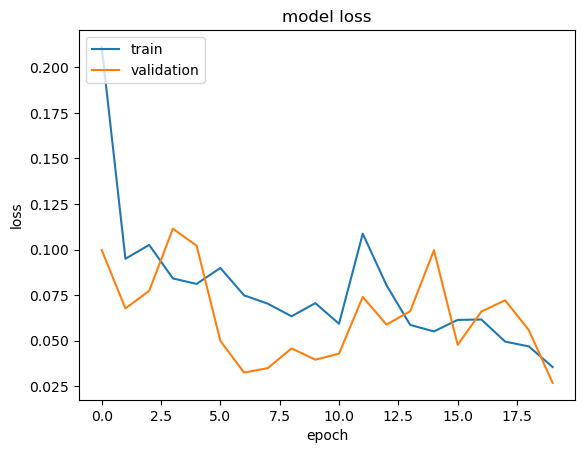

In [ ]:
# model training
history = model.fit(x_train_features, y_train ,epochs=20, callbacks=[model_checkpoint], batch_size=32,
                    validation_data=(x_test_features, y_test))
# accuracy for the model evaluation
# load the best model weights
#model.load_weights('best_model_cnn.hdf5')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
_, acc = model.evaluate(x_test_features, y_test)
print("Validation Accuracy:",acc)

13/13 [==============================] - 1s 45ms/step - loss: 0.0269 - acc: 0.9925
Validation Accuracy: 0.9925000071525574
